In [ ]:
DESCRIPTION

You've been asked to perform data analysis of service request (311) calls from New York City. 
You've also been asked to utilize data wrangling techniques to understand the pattern in the data 
and visualize the major types of complaints.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('311_Service_Requests.csv')

In [13]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [14]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [15]:
df.shape

(364558, 53)

In [16]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [18]:
import matplotlib.pyplot as plt

In [19]:
null_values=df.isnull().sum()

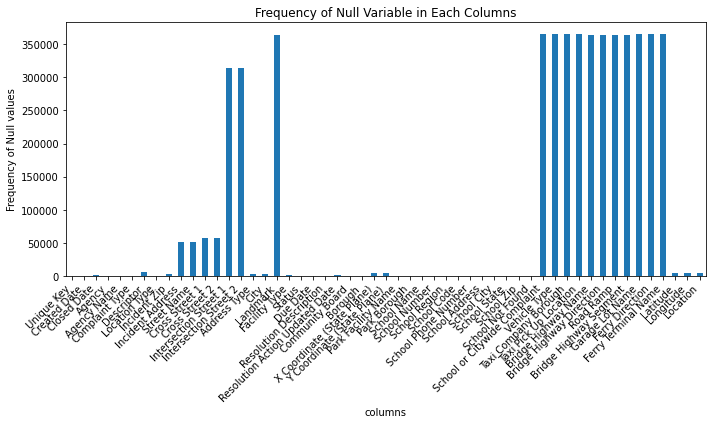

In [20]:
plt.figure(figsize=(10,6))
null_values.plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('Frequency of Null values')
plt.title('Frequency of Null Variable in Each Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
df1=df.dropna(subset=['Closed Date'])

In [22]:
df1.reset_index(drop=True, inplace=True)

In [23]:
df1.shape

(362177, 53)

In [31]:
time_diff = df1['Closed Date'].diff()
incorrect_timeline_mask = (time_diff < pd.Timedelta(0)) | (time_diff.isnull())
incorrect_rows = df1[incorrect_timeline_mask]

In [33]:
df1.shape

(362176, 53)

In [61]:
df1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [39]:
df1.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed,Time Elapsed (Days),Time Elapsed (Seconds)
0,29611005,2015-01-01 00:30:18,2015-01-01 00:43:38,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,2120 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.853389,-73.899611,"(40.853388919982194, -73.89961061461929)",0 days 00:13:20,0,800.0
1,29607567,2015-01-01 00:06:02,2015-01-01 00:43:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10453.0,NaN,...,NaN,NaN,NaN,NaN,40.848639,-73.911679,"(40.84863947227845, -73.91167941229558)",0 days 00:37:39,0,2259.0


In [44]:
print(df1['Time Elapsed (Seconds)'].describe())
print(df1['Time Elapsed (Days)'].describe())

count    3.621760e+05
mean     1.511334e+04
std      2.110256e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed (Seconds), dtype: float64
count    362176.000000
mean          0.014062
std           0.172679
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: Time Elapsed (Days), dtype: float64


In [46]:
complaint_type_null = df1['Complaint Type'].isnull().sum()
city_null = df1['City'].isnull().sum()
print("Number of null values in Complaint_Type column:", complaint_type_null)
print("Number of null values in City column:", city_null)

Number of null values in Complaint_Type column: 0
Number of null values in City column: 674


In [49]:
df1['City'].fillna('Unknown City', inplace=True)

In [72]:
import seaborn as sns

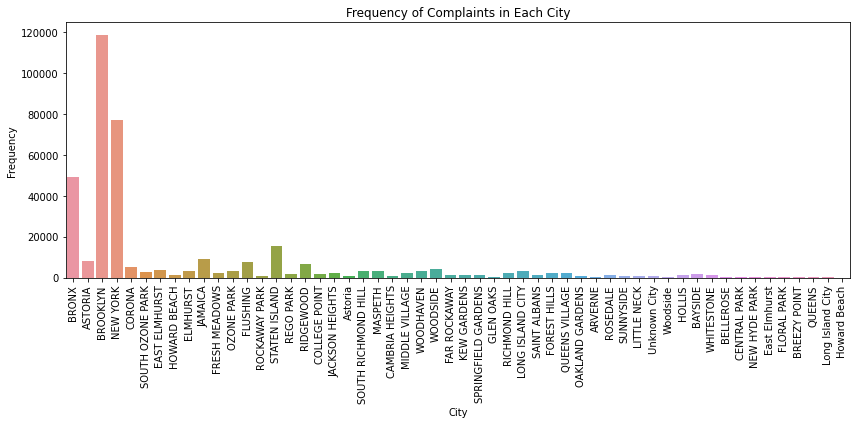

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df1)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Frequency of Complaints in Each City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
brooklyn_df = df1[df1['City'] == 'BROOKLYN']

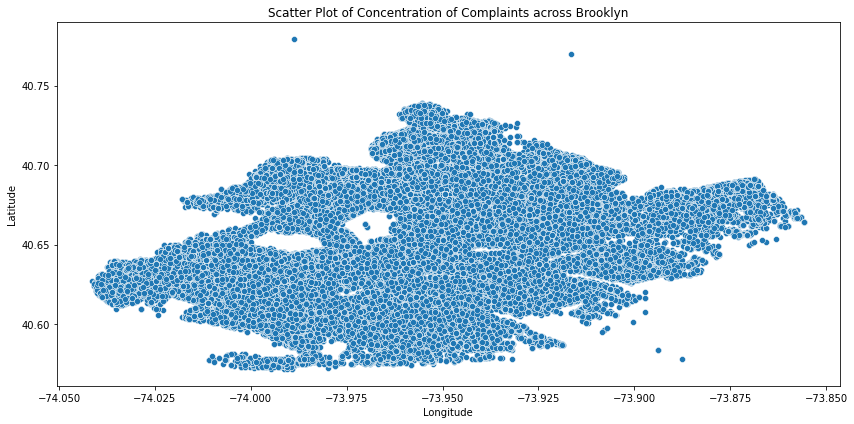

In [75]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=brooklyn_df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Concentration of Complaints across Brooklyn')
plt.tight_layout()
plt.show()

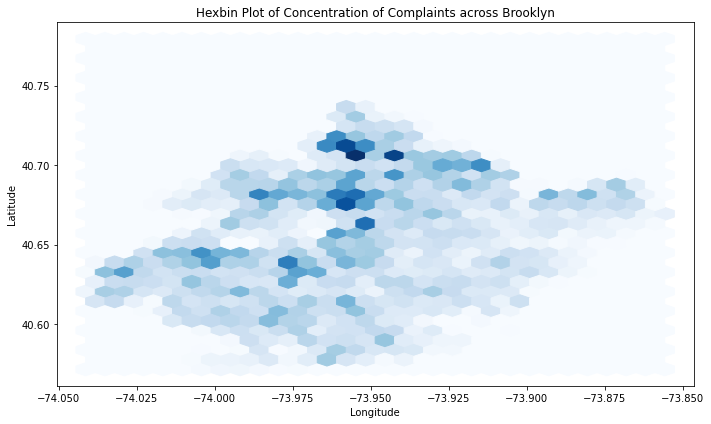

In [77]:
plt.figure(figsize=(10, 6))
plt.hexbin(x='Longitude', y='Latitude', data=brooklyn_df, gridsize=30, cmap='Blues')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Concentration of Complaints across Brooklyn')
plt.tight_layout()
plt.show()

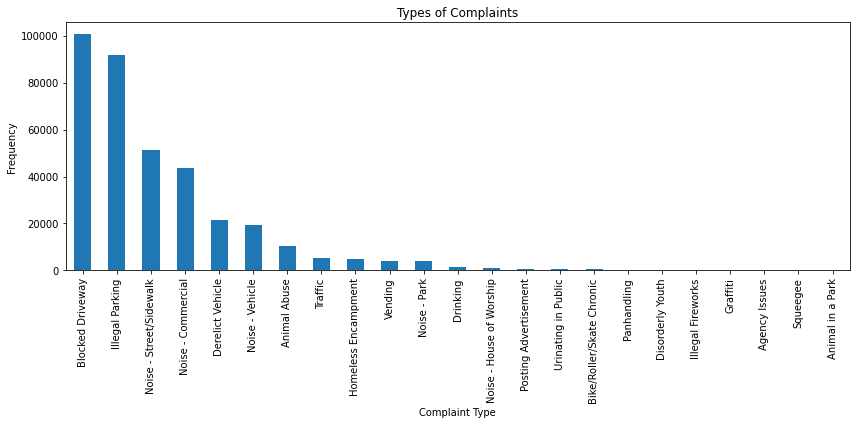

In [78]:
complaint_counts = df1['Complaint Type'].value_counts()
plt.figure(figsize=(12, 6))
complaint_counts.plot(kind='bar')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Types of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [82]:
nyc_df = df1[df1['City'] == 'NEW YORK']
complaint_frequency = nyc_df['Complaint Type'].value_counts()
complaint_frequency

Noise - Street/Sidewalk      22244
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

In [85]:
df1['Complaint Type'].value_counts().head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51138
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [93]:
df.groupby(['City', 'Complaint Type']).size()

City      Complaint Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            27
          Derelict Vehicle             8
          Illegal Parking            124
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 777, dtype: int64

In [94]:
df_new = df1.pivot_table(index='Complaint Type', columns='City', aggfunc='size', fill_value=0)

In [95]:
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,...,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,...,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,...,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,...,2,0,0,6,1,0,1,0,4,0


<Figure size 2160x1080 with 0 Axes>

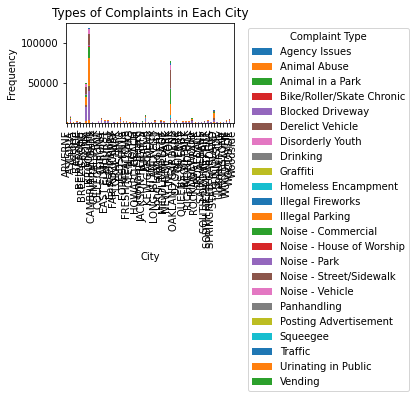

In [107]:
complaints_by_city = df1.groupby(['City','Complaint Type']).size().unstack(fill_value=0)
plt.figure(figsize=(30,15 ))
complaints_by_city.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Types of Complaints in Each City')
plt.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [127]:
df['Time Elapsed (Hours)'] = df1['Time Elapsed (Seconds)'] / 3600
complaints_by_location = df.groupby(['Complaint Type', 'City'])['Time Elapsed (Hours)'].mean()
sorted_complaints = complaints_by_location.reset_index().sort_values(by='Time Elapsed (Hours)')
sorted_complaints

,Complaint Type,City,Time Elapsed (Hours)
491,Noise - Park,BELLEROSE,0.105278
662,Posting Advertisement,LITTLE NECK,0.165278
70,Bike/Roller/Skate Chronic,SOUTH RICHMOND HILL,0.218333
668,Posting Advertisement,RIDGEWOOD,0.239722
63,Bike/Roller/Skate Chronic,MIDDLE VILLAGE,0.362500
...,...,...,...
54,Bike/Roller/Skate Chronic,EAST ELMHURST,17.142222
756,Vending,ARVERNE,18.421944
58,Bike/Roller/Skate Chronic,HOWARD BEACH,26.608333
483,Noise - House of Worship,SPRINGFIELD GARDENS,32.886944


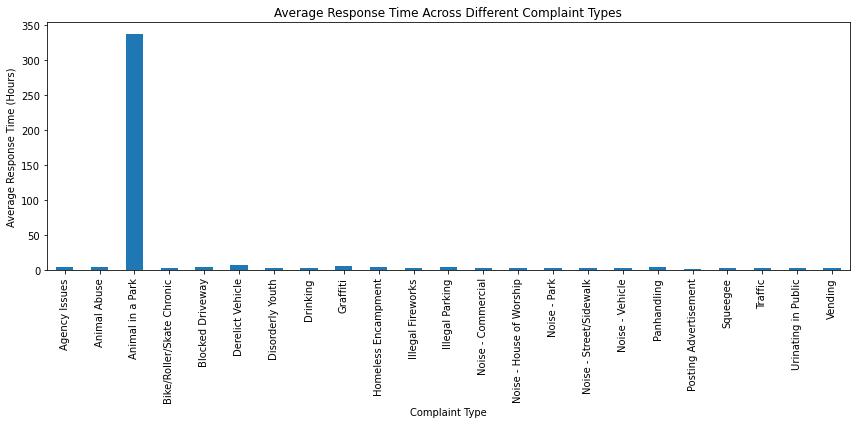

In [155]:
mean_response_time = df1.groupby('Complaint Type')['Time Elapsed(Hours)'].mean()
plt.figure(figsize=(12, 6))
mean_response_time.plot(kind='bar')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time (Hours)')
plt.title('Average Response Time Across Different Complaint Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

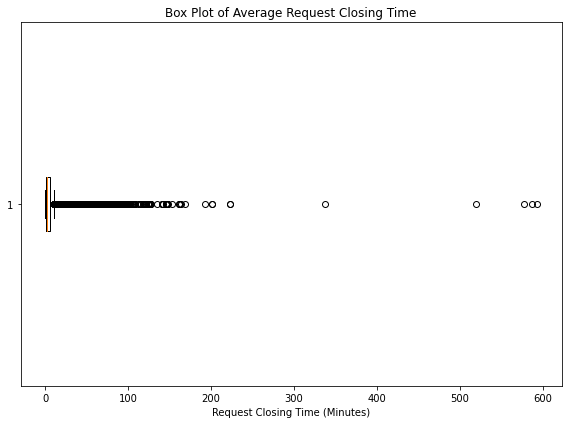

In [160]:
plt.figure(figsize=(8, 6))
plt.boxplot(df1['Time Elapsed(Hours)'], vert=False)
plt.xlabel('Request Closing Time (Minutes)')
plt.title('Box Plot of Average Request Closing Time')
plt.tight_layout()
plt.show()


In [161]:
import scipy.stats as stats

In [167]:
df1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [168]:
numerical_var1 = df1['Time Elapsed (Days)']
numerical_var2 = df1['Time Elapsed(Hours)']
categorical_var = df1['Complaint Type']
target_variable = df1['Agency Name']

In [169]:
t_stat, p_value_num = stats.ttest_ind(numerical_var1, numerical_var2)

In [170]:
cross_tab = pd.crosstab(categorical_var, target_variable)
chi2, p_value_cat, _, _ = stats.chi2_contingency(cross_tab)

In [171]:
alpha = 0.05
if p_value_num < alpha:
    print("Numerical variables (Variable1 and Variable2) are significant.")
else:
    print("Numerical variables (Variable1 and Variable2) are not significant.")

if p_value_cat < alpha:
    print("Categorical variable (Category) is significant.")
else:
    print("Categorical variable (Category) is not significant.")


Numerical variables (Variable1 and Variable2) are significant.
Categorical variable (Category) is significant.


In [173]:
numerical_var = df1['Time Elapsed(Hours)']
categorical_var = df1['Complaint Type']

In [174]:
h_statistic, p_value = stats.kruskal(*[numerical_var[categorical_var == group] for group in categorical_var.unique()])

In [175]:
alpha = 0.05
if p_value < alpha:
    print("The Kruskal-Wallis H test is significant, indicating at least one group has a different median.")
else:
    print("The Kruskal-Wallis H test is not significant, indicating no significant difference in medians between groups.")

The Kruskal-Wallis H test is significant, indicating at least one group has a different median.
